In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn import preprocessing
from tqdm import tqdm

# Data cleaned

In [30]:
data = pd.read_csv('data.csv', sep=';')
data

,timestamps_UTC,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
0,2023-08-01 03:44:12,181.0,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0,14.8,0.0,18.6,0.1
1,2023-08-01 06:36:29,143.0,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0,14.4,0.0,19.1,1.1
2,2023-08-24 06:53:54,183.0,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0,18.2,0.0,12.1,2.4
3,2023-08-01 13:53:38,177.0,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0,19.9,0.2,25.0,12.6
4,2023-08-24 07:02:30,143.0,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0,18.7,0.0,9.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199995,2023-03-01 04:46:47,117.0,51.063446,3.739656,38.0,34.0,469.0,431.0,1292.0,1261.0,77.0,77.0,74.0,72.0,-2.2,0.0,10.9,0.0
2199996,2023-03-01 04:46:40,189.0,50.774965,3.873212,3.0,12.0,282.0,313.0,801.0,804.0,65.0,71.0,57.0,68.0,-2.2,0.0,10.9,0.0
2199997,2023-03-01 04:47:27,173.0,50.400794,4.457923,17.0,13.0,227.0,331.0,799.0,803.0,78.0,73.0,72.0,64.0,-2.2,0.0,10.9,0.0
2199998,2023-03-01 04:46:24,135.0,51.031679,3.726717,20.0,29.0,175.0,189.0,801.0,833.0,85.0,78.0,86.0,84.0,-2.2,0.0,10.9,0.0


Take a portion of the data

In [18]:
portion = 0.2
data = data.sample(frac=portion, random_state=42)
data

,timestamps_UTC,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
15437382,2023-02-22 20:34:00,144.0,50.951906,3.780262,31.0,31.0,313.0,327.0,1102.0,1232.0,90.0,80.0,93.0,85.0,8.5,0.2,4.7,0.9
5396282,2023-09-05 05:16:12,154.0,50.849448,3.813797,40.0,36.0,407.0,393.0,1438.0,1433.0,88.0,86.0,84.0,84.0,15.9,0.0,9.7,0.7
13363544,2023-08-09 02:36:20,176.0,51.015715,3.774011,20.0,21.0,200.0,210.0,793.0,803.0,79.0,82.0,82.0,80.0,15.0,0.9,11.0,0.4
3305476,2023-05-16 10:28:02,102.0,50.873276,3.814787,37.0,33.0,193.0,207.0,795.0,810.0,85.0,84.0,87.0,87.0,11.1,0.0,19.6,2.6
14833669,2023-03-07 04:07:45,197.0,50.277293,4.414276,33.0,38.0,196.0,272.0,801.0,797.0,82.0,75.0,81.0,76.0,4.2,0.1,20.9,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237368,2023-05-11 01:52:45,185.0,51.190193,5.112672,18.0,14.0,227.0,334.0,803.0,797.0,78.0,62.0,76.0,57.0,10.2,0.1,8.0,1.4
1068130,2023-07-11 06:52:23,197.0,50.057235,4.492603,40.0,40.0,224.0,289.0,799.0,799.0,78.0,69.0,75.0,71.0,18.2,0.0,14.5,67.9
11896266,2023-03-15 04:01:49,115.0,50.095166,4.526235,22.0,17.0,193.0,279.0,801.0,800.0,79.0,66.0,77.0,63.0,2.3,0.1,11.9,1.1
15093739,2023-05-16 10:58:35,151.0,51.180549,3.575516,24.0,25.0,244.0,224.0,789.0,812.0,66.0,86.0,66.0,89.0,11.1,0.0,19.6,2.6


**Take columns of interest**

In [31]:
columns_of_interest = ['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
                         'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
                         'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temperature',
                         'precipitation', 'windspeed_10m', 'sum_pollen']

X = data[columns_of_interest].values

# Fuzzy algorithm

Scale data

In [32]:
def scale(data):
    scaler = preprocessing.RobustScaler()
    return scaler.fit_transform(data)

Choose de number of clusters

In [13]:
fpcs = []

for ncenters in tqdm(range(2, 10)):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        scale(X).T, ncenters, 2, error=0.05, maxiter=1000, init=None, seed=3)

    # Store fpc values 
    fpcs.append(fpc)

100%|██████████| 8/8 [09:27<00:00, 70.97s/it] 


Text(0, 0.5, 'Fuzzy partition coefficient (FPC)')

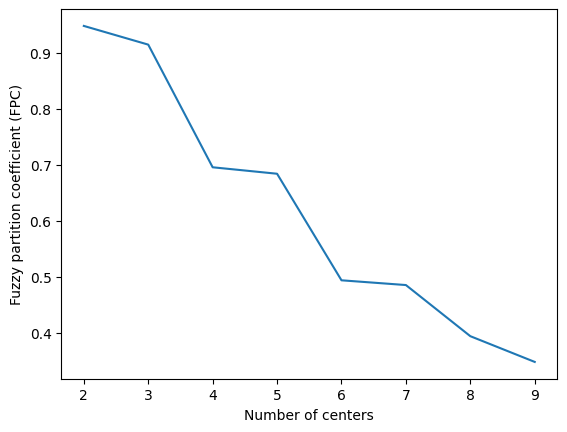

In [14]:
fig1, ax1 = plt.subplots()
ax1.plot(np.r_[2:10], fpcs)
ax1.set_xlabel("Number of centers")
ax1.set_ylabel("Fuzzy partition coefficient (FPC)")

Fuzzy with a specified number of cluster

In [33]:
# Parameters of Fuzzy C-means
n_clusters = 2
m = 2
error_threshold = 0.005
data_T = scale(X).T

# Execution of Fuzzy C-means
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    data_T, n_clusters, m, error=error_threshold, maxiter=1000, init=None, seed=3
)

fpc

0.9479734173395802

In [34]:
membership_values = np.argmax(u, axis=0)

In [35]:
elements_cluster = np.bincount(membership_values)

for cluster_num, count in enumerate(elements_cluster):
    print(f"Cluster {cluster_num + 1}: {count} elements")

Cluster 1: 1789886 elements
Cluster 2: 410114 elements


Mean by cluster

In [38]:
data['cluster'] = membership_values
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
mean = data.groupby('cluster')[numeric_columns].mean()
data = data.drop('cluster', axis=1)
mean

,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,cluster
cluster,,,,,,,,,,,,,,,,,,
0,150.756265,50.863216,4.218713,29.115549,29.237910,248.971136,255.244519,795.556467,790.145931,76.540579,75.808999,75.462586,75.071184,12.875326,0.105137,13.370106,20.574431,0.0
1,151.783570,50.936239,4.284937,36.984106,37.224234,371.083144,381.083351,1587.854029,1592.730654,83.726634,83.115823,85.100345,85.029096,13.509495,0.108306,13.549563,20.516530,1.0


Compute the distances

In [20]:
distances = np.linalg.norm(data_T - cntr.T[:, membership_values], axis=0)

Choose the distance threshold

In [21]:
outlier_distance_threshold = 21

Plot distribution of distances

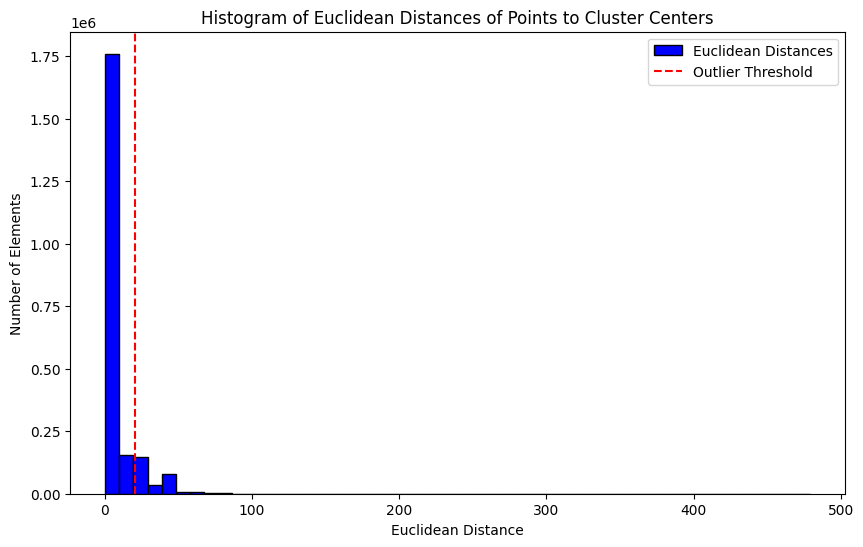

In [22]:
# Create a histogram of Euclidean distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=50, color='b', edgecolor='black', label='Euclidean Distances')
plt.axvline(x=outlier_distance_threshold, color='r', linestyle='--', label='Outlier Threshold')
plt.title('Histogram of Euclidean Distances of Points to Cluster Centers')
plt.xlabel('Euclidean Distance')
plt.ylabel('Number of Elements')
plt.legend()
plt.show()

In [23]:
outliers = data[distances > outlier_distance_threshold]
data['fuzzy'] = (distances > outlier_distance_threshold).astype(int)
print("Number of outliers :", outliers.shape[0])

Number of outliers : 268669


Save in csv

In [ ]:
data.to_csv('Fuzzy_with_outlier.csv', index=False, sep=';')